# Continuous Control

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
import random
import torch
import numpy as np
from collections import deque

import matplotlib.pyplot as plt
%matplotlib inline

from unityagents import UnityEnvironment
from ddpg_agent import Agent


Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
env = UnityEnvironment(file_name="Reacher_Windows_x86_64/Reacher.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]


### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [ 0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726624e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
"""
env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
"""

"\nenv_info = env.reset(train_mode=False)[brain_name]     # reset the environment    \nstates = env_info.vector_observations                  # get the current state (for each agent)\nscores = np.zeros(num_agents)                          # initialize the score (for each agent)\nwhile True:\n    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)\n    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1\n    env_info = env.step(actions)[brain_name]           # send all actions to tne environment\n    next_states = env_info.vector_observations         # get next state (for each agent)\n    rewards = env_info.rewards                         # get reward (for each agent)\n    dones = env_info.local_done                        # see if episode finished\n    scores += env_info.rewards                         # update the score (for each agent)\n    states = next_states                               # roll over states to next ti

### Let's implement DDPG

In [6]:
import time

def ddpg_continuous(num_agents, n_episodes=1000, max_t=1000):
    scores_deque = deque(maxlen=100)
    scores_deque_avg = []
    scores = []
    start_time = time.time()
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        states = env_info.vector_observations
        #state = torch.tensor(env.reset(), dtype=torch.int8, device=device)
        agent.reset()#reset the OUNoise
        score = np.zeros(num_agents)
        score_avg = 0
        for t in range(max_t):
            actions = agent.act(states)
            #actions = [agent.act(states[i]) for i in range(num_agents)]

            env_info = env.step(actions)[brain_name]
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
        
            #for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
            agent.step(states, actions, rewards, next_states, dones)
            
            states = next_states
            score += np.array(rewards)
            if np.any(dones):
                break
                
        score_avg = np.mean(score)
        scores.append(score_avg)
        scores_deque.append(score_avg)
        scores_deque_avg.append(np.mean(scores_deque))
        now_time = time.time() - start_time
        
        print('\rEpisode {} Average Score deque: {:.2f}  score: {:.2f} time: {}'.format(i_episode, np.mean(scores_deque),score_avg,now_time, end=""))
        if i_episode>100 and np.mean(scores_deque)>30.:
            print("envionment solved")
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth') # save weight for actor
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') # save weight for critic
            return scores
        
        if i_episode%20 == 0:
            #torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth') # save weight for actor
            #torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth') # save weight for critic
            window = int(i_episode/5 +1)
            filter = np.ones(window)/window
            fig = plt.figure(figsize=(20,10))
            ax = fig.add_subplot(111)
            plt.plot(scores,label = 'Real scores')
            plt.plot(np.convolve(scores, filter)[:-window],label = 'Smoothed scores along time')
            plt.plot(scores_deque_avg,label = 'Mean of the 100 last episodes')
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
    return scores,scores_deque_avg



### Here we train the Agent

Episode 1 Average Score deque: 0.80  score: 0.80 time: 64.83204126358032
Episode 2 Average Score deque: 0.85  score: 0.90 time: 134.45823311805725
Episode 3 Average Score deque: 0.91  score: 1.03 time: 187.95160913467407
Episode 4 Average Score deque: 0.89  score: 0.82 time: 238.60235786437988
Episode 5 Average Score deque: 0.93  score: 1.08 time: 299.04194355010986
Episode 6 Average Score deque: 0.97  score: 1.18 time: 347.12591576576233
Episode 7 Average Score deque: 0.99  score: 1.11 time: 392.39102840423584
Episode 8 Average Score deque: 1.04  score: 1.41 time: 466.5488324165344
Episode 9 Average Score deque: 1.14  score: 1.95 time: 528.514675617218
Episode 10 Average Score deque: 1.23  score: 1.97 time: 588.8477704524994
Episode 11 Average Score deque: 1.28  score: 1.86 time: 668.5049657821655
Episode 12 Average Score deque: 1.42  score: 2.86 time: 730.5316784381866
Episode 13 Average Score deque: 1.57  score: 3.48 time: 808.1864547729492
Episode 14 Average Score deque: 1.76  scor

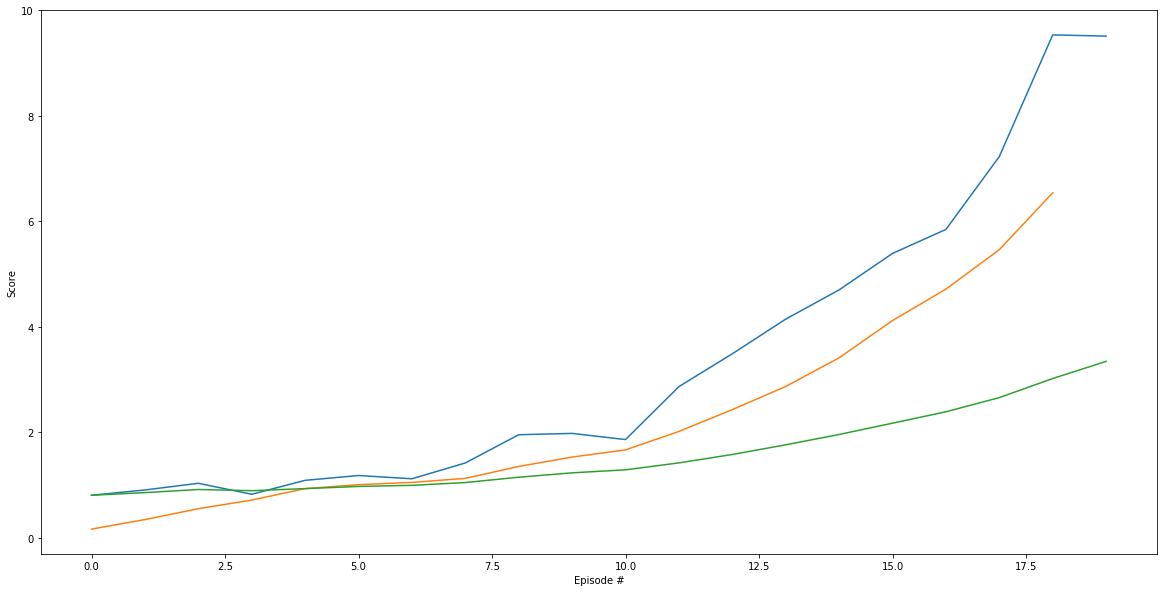

Episode 21 Average Score deque: 3.77  score: 12.30 time: 1288.1020994186401
Episode 22 Average Score deque: 4.24  score: 14.25 time: 1346.0677065849304
Episode 23 Average Score deque: 4.90  score: 19.44 time: 1401.412745475769
Episode 24 Average Score deque: 5.53  score: 19.89 time: 1446.5847969055176
Episode 25 Average Score deque: 6.11  score: 20.18 time: 1496.2193558216095
Episode 26 Average Score deque: 6.82  score: 24.51 time: 1556.5456211566925
Episode 27 Average Score deque: 7.56  score: 26.83 time: 1604.2402522563934
Episode 28 Average Score deque: 8.33  score: 28.90 time: 1648.5061955451965
Episode 29 Average Score deque: 9.22  score: 34.29 time: 1706.6648390293121
Episode 30 Average Score deque: 9.90  score: 29.70 time: 1761.1577937602997
Episode 31 Average Score deque: 10.70  score: 34.45 time: 1806.543824672699
Episode 32 Average Score deque: 11.45  score: 34.95 time: 1856.0519421100616
Episode 33 Average Score deque: 12.20  score: 36.14 time: 1915.7896072864532
Episode 34 

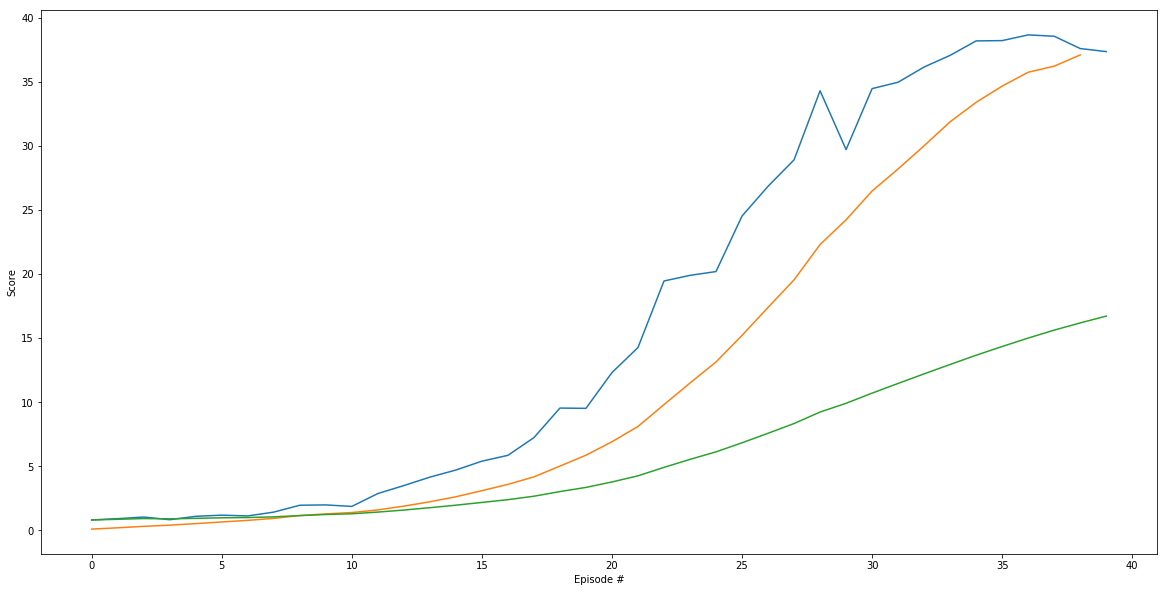

Episode 41 Average Score deque: 17.18  score: 36.31 time: 2348.2772028446198
Episode 42 Average Score deque: 17.67  score: 37.57 time: 2400.0791375637054
Episode 43 Average Score deque: 18.15  score: 38.46 time: 2462.760841369629
Episode 44 Average Score deque: 18.61  score: 38.30 time: 2514.712527990341
Episode 45 Average Score deque: 19.04  score: 38.02 time: 2563.9063637256622
Episode 46 Average Score deque: 19.45  score: 37.70 time: 2630.9699368476868
Episode 47 Average Score deque: 19.77  score: 34.52 time: 2703.4974699020386
Episode 48 Average Score deque: 20.10  score: 35.50 time: 2807.8443870544434
Episode 49 Average Score deque: 20.41  score: 35.37 time: 2873.6084520816803
Episode 50 Average Score deque: 20.73  score: 36.33 time: 2920.972225666046
Episode 51 Average Score deque: 21.02  score: 35.90 time: 2971.1964826583862
Episode 52 Average Score deque: 21.29  score: 34.95 time: 3039.356381177902
Episode 53 Average Score deque: 21.57  score: 35.88 time: 3093.806015253067
Epis

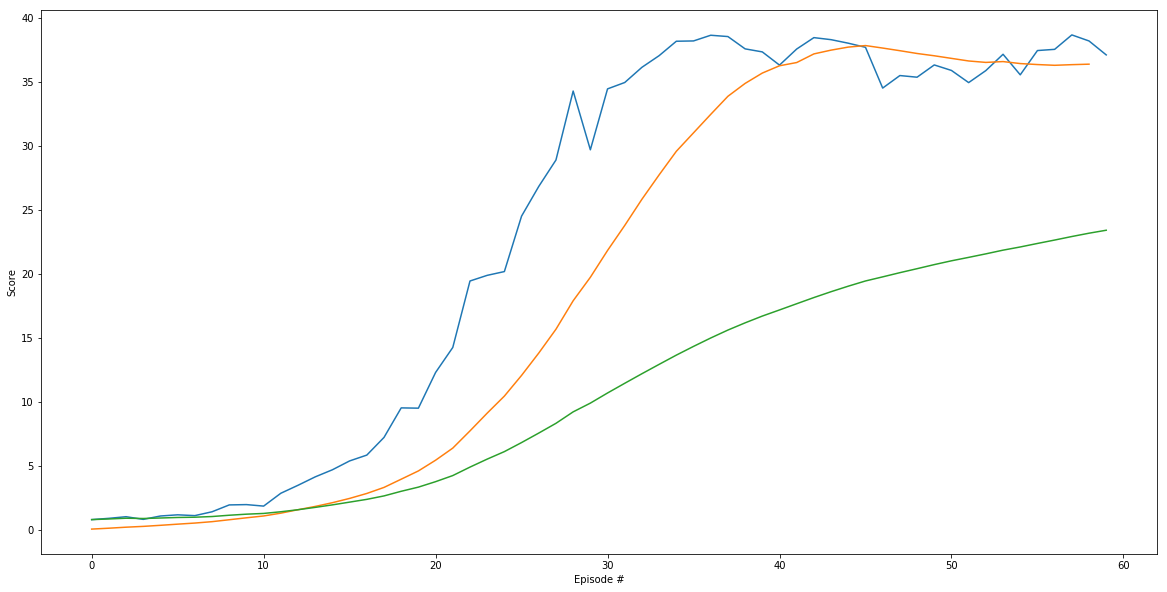

Episode 61 Average Score deque: 23.64  score: 37.24 time: 3503.3392429351807
Episode 62 Average Score deque: 23.87  score: 37.89 time: 3560.14262676239
Episode 63 Average Score deque: 24.10  score: 38.53 time: 3617.3014419078827
Episode 64 Average Score deque: 24.29  score: 36.27 time: 3663.1625730991364
Episode 65 Average Score deque: 24.49  score: 37.02 time: 3713.118942260742
Episode 66 Average Score deque: 24.67  score: 36.52 time: 3773.756502866745
Episode 67 Average Score deque: 24.87  score: 37.92 time: 3824.8372106552124
Episode 68 Average Score deque: 25.02  score: 35.39 time: 3877.1018645763397
Episode 69 Average Score deque: 25.23  score: 39.07 time: 3956.988774061203
Episode 70 Average Score deque: 25.39  score: 36.70 time: 4019.111302137375
Episode 71 Average Score deque: 25.56  score: 37.77 time: 4072.8044834136963
Episode 72 Average Score deque: 25.74  score: 38.15 time: 4134.248496770859
Episode 73 Average Score deque: 25.91  score: 38.47 time: 4185.101784706116
Episode

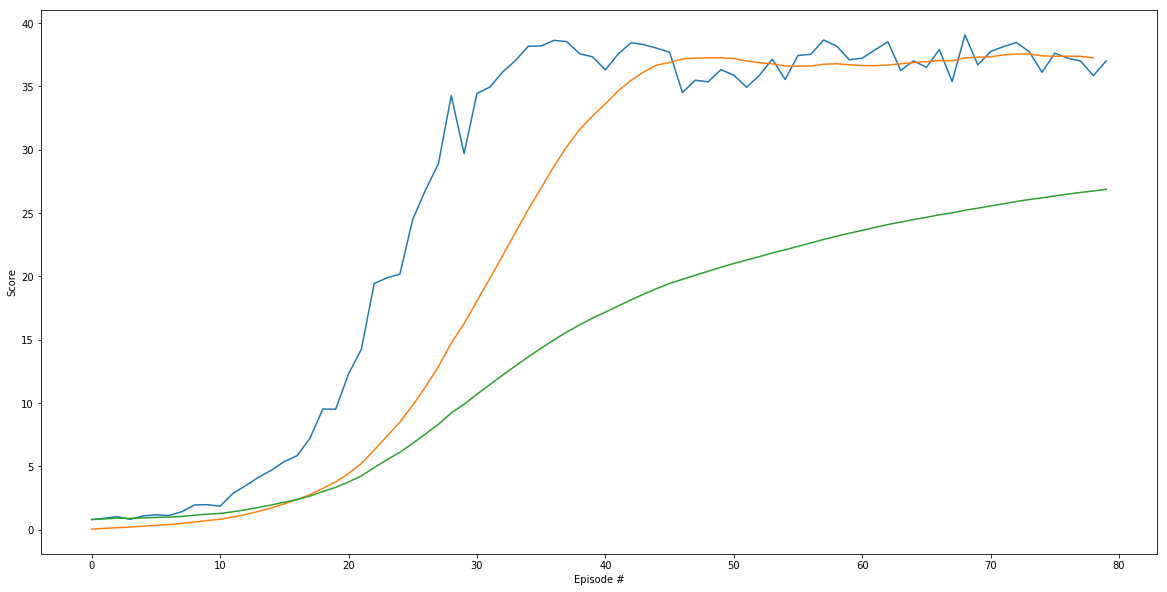

Episode 81 Average Score deque: 27.01  score: 37.34 time: 4700.018676042557
Episode 82 Average Score deque: 27.14  score: 38.14 time: 4750.301167964935
Episode 83 Average Score deque: 27.25  score: 36.39 time: 4805.376575708389
Episode 84 Average Score deque: 27.35  score: 35.55 time: 4870.009046316147
Episode 85 Average Score deque: 27.47  score: 37.07 time: 4927.937295913696
Episode 86 Average Score deque: 27.58  score: 36.75 time: 4981.5434312820435
Episode 87 Average Score deque: 27.68  score: 37.04 time: 5056.8353571891785
Episode 88 Average Score deque: 27.78  score: 36.21 time: 5116.29177904129
Episode 89 Average Score deque: 27.89  score: 37.43 time: 5175.661903381348
Episode 90 Average Score deque: 27.99  score: 37.13 time: 5238.949797153473
Episode 91 Average Score deque: 28.10  score: 37.97 time: 5285.419111728668
Episode 92 Average Score deque: 28.20  score: 36.95 time: 5344.516646385193
Episode 93 Average Score deque: 28.30  score: 37.98 time: 5408.0866820812225
Episode 94

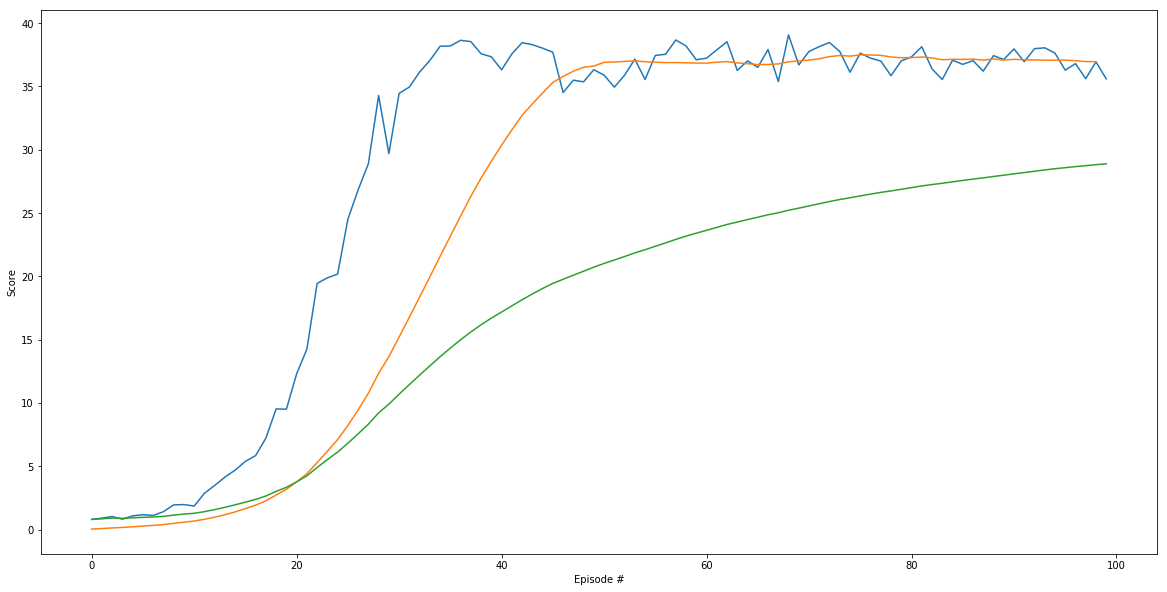

Episode 101 Average Score deque: 29.26  score: 37.19 time: 5856.063688993454
Episode 102 Average Score deque: 29.60  score: 35.76 time: 5920.415598630905
Episode 103 Average Score deque: 29.96  score: 37.04 time: 5985.941804647446
Episode 104 Average Score deque: 30.33  score: 36.91 time: 6036.282389163971
envionment solved


ValueError: too many values to unpack (expected 2)

In [7]:
#Create the agent 
agent = Agent(state_size=state_size, action_size=action_size, random_seed=8)

#launch the training process
scores,scores_deque_avg = ddpg_continuous(num_agents)            



### rough learning curve
Plot the average of the score  episode by episode.

NameError: name 'scores' is not defined

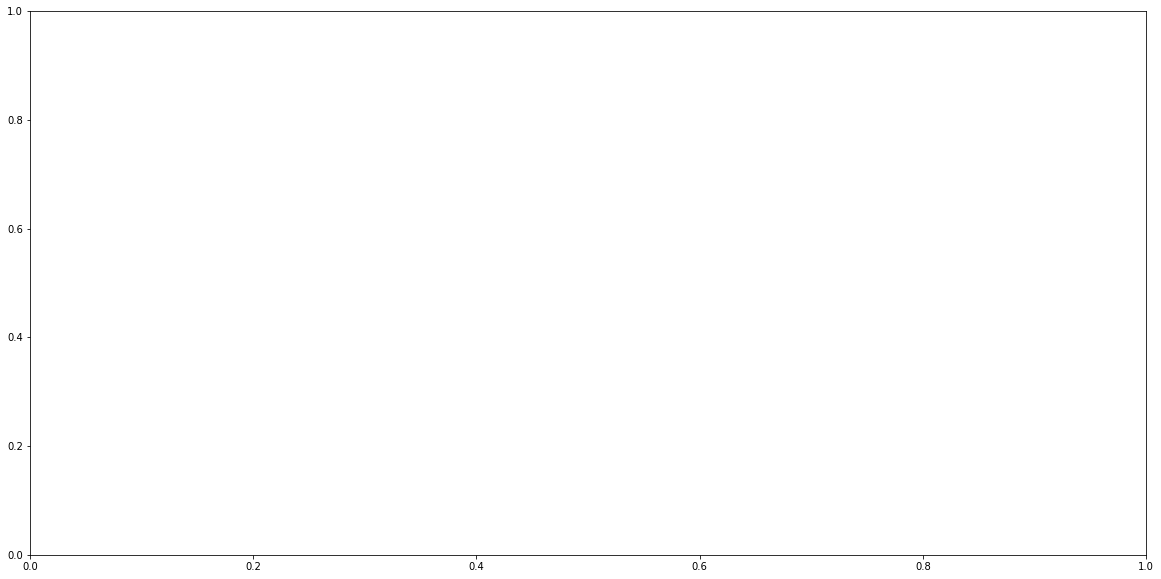

In [8]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores,label = 'DDPG Continuous Control')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Smoothed learning curve
plot the average of the score.
window gives us the ability to smooth the curve. For exemple, for the 120th episode, we will average episode 20 to 120 if window = 100.

In [ ]:
window = 20
filter = np.ones(window)/window
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
plt.plot(np.convolve(scores, filter)[:-window],label = 'DDPG Continuous Control')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Load and watch a trained agent

Score : 35.28


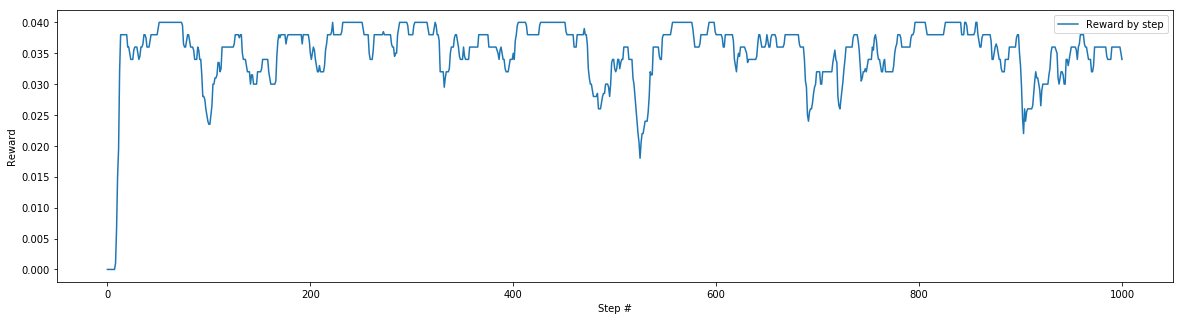

In [9]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
num_agents = len(env_info.agents)
scores = np.zeros(num_agents)   

agent = Agent(state_size=env_info.vector_observations.shape[1], action_size=brain.vector_action_space_size, random_seed=10)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))

meanRewardEveryStep = []
for t_step in range (2000):
    
    
    actions = agent.act(states)         # select an action (for each agent)
    #actions = np.clip(actions, -1, 1)                  # already done with the noise in ddpg_agent
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    
    #agent.step(states, actions, rewards, next_states, dones)
    states = next_states
    scores = scores + rewards                             # roll over states to next time step
    meanRewardEveryStep.append(np.mean(rewards))
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Score : {:.2f}'.format(np.mean(scores)))

# plot the mean reward among each robotic arm for each step
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(111)
plt.plot(np.arange(len(meanRewardEveryStep)), meanRewardEveryStep, label='Reward by step')
plt.legend()
plt.ylabel('Reward')
plt.xlabel('Step #')
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()

In [ ]:
print(brain.vector_action_space_size)



In [ ]:
print(agent.act(20,states, add_noise=True) )

In [ ]:
print(rewards)

In [ ]:
from ddpg_agent import OUNoise
noise = OUNoise(4, 1)
noise.sample()
print(actions)
#a = noise.sample()
a = [noise.sample() for _ in range(20)]
print(a)
actions +=a
print(actions)